In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy

from pomegranate import *

numpy.random.seed(0)
numpy.set_printoptions(suppress=True)

%load_ext watermark
%watermark -m -n -p numpy,scipy,pomegranate

Tue Dec 04 2018 

numpy 1.15.2
scipy 0.19.1
pomegranate 0.10.0

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


improved algorithm:
- manually add seed emission and transition probabilities
- build hmm
- feed the model seqeuence samples using the forward backward algorithm

In [3]:
class PacketSize:
    def __init__(self, packet_size):
        self.packet_size = packet_size
        
#         self.device = device
        
    def __str__(self):
        return "{}".format(self.packet_size)
    
    

In [4]:
p1 = PacketSize(103)
p2 = PacketSize(111)
p3 = PacketSize(1185)
p4 = PacketSize(120)
p5 = PacketSize(121)
p6 = PacketSize(122)
p7 = PacketSize(129)
p8 = PacketSize(132)
p9 = PacketSize(138)
p10 = PacketSize(141)
p11 = PacketSize(145)
p12 = PacketSize(146)
p13 = PacketSize(223)
p14 = PacketSize(284)
p15 = PacketSize(285)
p16 = PacketSize(304)
p17 = PacketSize(305)
p18 = PacketSize(306)
p19 = PacketSize(342)
p20 = PacketSize(414)
p21 = PacketSize(415)
p22 = PacketSize(416)
p23 = PacketSize(417)
p24 = PacketSize(418)
p25 = PacketSize(419)
p26 = PacketSize(420)
p27 = PacketSize(421)
p28 = PacketSize(425)
p29 = PacketSize(426)
p30 = PacketSize(427)
p31 = PacketSize(434)
p32 = PacketSize(435)
p33 = PacketSize(436)
p34 = PacketSize(438)
p35 = PacketSize(439)
p36 = PacketSize(535)
p37 = PacketSize(559)
p38 = PacketSize(744)

In [5]:
# 'SYLVANIA_SMART+_Smart_Plug' plug
d1 = DiscreteDistribution.from_samples([p23, p23, p37, p23, p22, p23, p25, p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38])

# 'name': 'Kwikset_10-Button_Deadbolt' 
d2 = DiscreteDistribution.from_samples([p11, p7, p9, p5, p12, p6, p19, p3, p9, p5, p9, p5, p9, p5, p8, p2, p12, p4, p13, p1, p36, p10, p9, p5, p11, p7, p9, p5, p12, p6, p11, p7, p9, p5, p12, p6, p9, p5, p11, p7, p9, p5, p12, p6, p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38])

# {'name': 'SYLVANIA_Smart_10Y_A19_TW' bulb
d3 = DiscreteDistribution.from_samples([p16, p28, p16, p29, p16, p30, p16, p28, p16, p29, p8, p2, p12, p4, p13, p1, p36, p10, p15, p25, p27, p22, p24, p14, p25, p26, p23, p22, p15, p23, p25, p22, p22, p15, p38, p23, p23, p15, p24, p25, p22, p8, p2, p12, p4, p13, p1, p36, p10, p22, p14, p26, p27, p23, p23, p15, p25, p26, p21, p23, p18, p24, p23, p17, p22, p22, p17, p22, p20, p18, p23, p23, p18, p23, p22, p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38])

# {'name': 'OSRAM_LIGHTIFY_Dimming_Switch' , light
d4 = DiscreteDistribution.from_samples([p34, p34, p35, p35, p34, p19, p3, p32, p8, p2, p12, p4, p13, p1, p36, p10, p31, p32, p33, p32, p32, p32, p33, p34, p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p30,p31,p32,p33,p34,p35,p36,p37,p38])

samples = [d1,d2,d3,d4]

print('samples:')
for dd in samples:
    print(dd)

s1 = State(d1, name='smart plug')
s2 = State(d2, name='deadbolt')
s3 = State(d3, name="bulb")
s4 = State(d4, name="light")

samples:
{
    "class" :"Distribution",
    "dtype" :"__main__.PacketSize",
    "name" :"DiscreteDistribution",
    "parameters" :[
        {
            "417" :0.1111111111111111,
            "559" :0.044444444444444446,
            "416" :0.044444444444444446,
            "419" :0.044444444444444446,
            "103" :0.022222222222222223,
            "111" :0.022222222222222223,
            "1185" :0.022222222222222223,
            "120" :0.022222222222222223,
            "121" :0.022222222222222223,
            "122" :0.022222222222222223,
            "129" :0.022222222222222223,
            "132" :0.022222222222222223,
            "138" :0.022222222222222223,
            "141" :0.022222222222222223,
            "145" :0.022222222222222223,
            "146" :0.022222222222222223,
            "223" :0.022222222222222223,
            "284" :0.022222222222222223,
            "285" :0.022222222222222223,
            "304" :0.022222222222222223,
            "305" :0.022222222222222223

In [7]:
model = HiddenMarkovModel('Device Identification')


model.add_states(s1, s2, s3, s4)

In [8]:
model.add_transition(model.start, s1, 0.25)
model.add_transition(model.start, s2, 0.25)
model.add_transition(model.start, s3, 0.25)
model.add_transition(model.start, s4, 0.25)

model.add_transition(s1, s1, 0.25)
model.add_transition(s1, s2, 0.25)
model.add_transition(s1, s3, 0.25)
model.add_transition(s1, s4, 0.25)

model.add_transition(s2, s1, 0.25)
model.add_transition(s2, s2, 0.25)
model.add_transition(s2, s3, 0.25)
model.add_transition(s2, s4, 0.25)

model.add_transition(s3, s1, 0.25)
model.add_transition(s3, s2, 0.25)
model.add_transition(s3, s3, 0.25)
model.add_transition(s3, s4, 0.25)

model.add_transition(s4, s1, 0.25)
model.add_transition(s4, s2, 0.25)
model.add_transition(s4, s3, 0.25)
model.add_transition(s4, s4, 0.25)

In [10]:
# single device sequences
seq1 = [p11, p7, p9, p5, p12, p6] 
seq2 = [p19, p3, p9, p5] 
seq3 = [p9, p5] 
seq4 = [p9, p5] 
seq5 = [p8, p2, p12, p4, p13, p1, p36, p10, p9, p5] 
seq6 = [p11, p7, p9, p5, p12, p6] 
seq7 = [p11, p7, p9, p5, p12, p6] 
seq8 = [p9, p5] 
seq9 = [p11, p7, p9, p5, p12, p6]
seq10 = [p16, p28] 
seq11 = [p16, p29] 
seq12 = [p16, p30] 
seq13 = [p16, p28] 
seq14 = [p16, p29, p8, p2, p12, p4, p13, p1, p36, p10] 
seq15 = [p15, p25, p27, p22, p24] 
seq16 = [p14, p25, p26, p23, p22] 
seq17 = [p15, p23, p25, p22, p22] 
seq18 = [p15, p38, p23, p23] 
seq19 = [p15, p24, p25, p22, p8, p2, p12, p4, p13, p1, p36, p10, p22] 
seq20 = [p14, p26, p27, p23, p23] 
seq21 = [p15, p25, p26, p21, p23] 
seq22 = [p18, p24, p23] 
seq23 = [p17, p22, p22]
seq24 = [p17, p22, p20] 
seq25 = [p18, p23, p23] 
seq26 = [p18, p23, p22]
seq27 = [p34] 
seq28 = [p34] 
seq29 = [p35] 
seq30 = [p35] 
seq31 = [p34] 
seq32 = [p19, p3, p32] 
seq33 = [p8, p2, p12, p4, p13, p1, p36, p10, p31] 
seq34 = [p32] 
seq35 = [p33] 
seq36 = [p32]
seq37 = [p32]
seq38 = [p32] 
seq39 = [p33] 
seq40 = [p34]
seq41 = [p23] 
seq42 = [p23] 
seq43 = [p37, p23] 
seq44 = [p22] 
seq45 = [p23, p25]

# two-device combinations
seq46 = [p34, p11, p7, p9, p5, p12, p11, p6, p7, p9, p5, p12, p6, p35, p33, p11, p7, p9, p5, p12, p6]
seq47 = [p15, p25, p26, p23, p23, p34, p15, p25, p33, p34]
seq48 = [p15, p22, p11, p7, p9, p5, p12, p11, p6, p7, p9, p5, p12, p6, p15, p22]



X = [seq1, seq2, seq3, seq4, seq5, seq6, seq7, seq8, seq9, seq10, seq11, seq12,
    seq13, seq14, seq15, seq16, seq17, seq18, seq19, seq20, seq21, seq22,
    seq23, seq24, seq25, seq26, seq27, seq28, seq29, seq30, seq31, seq32, seq33, seq34,
     seq35, seq36, seq37, seq38, seq39, seq40, seq41, seq42, seq43, seq44, seq45,
    seq46, seq47, seq48 ]

model.bake()

model.fit(sequences=X, algorithm='baum-welch')

{
    "class" : "HiddenMarkovModel",
    "name" : "Device Identification",
    "start" : {
        "class" : "State",
        "distribution" : null,
        "name" : "Device Identification-start",
        "weight" : 1.0
    },
    "end" : {
        "class" : "State",
        "distribution" : null,
        "name" : "Device Identification-end",
        "weight" : 1.0
    },
    "states" : [
        {
            "class" : "State",
            "distribution" : {
                "class" : "Distribution",
                "dtype" : "__main__.PacketSize",
                "name" : "DiscreteDistribution",
                "parameters" : [
                    {
                        "304" : 0.0,
                        "425" : 0.0,
                        "426" : 0.0,
                        "427" : 0.0,
                        "132" : 0.0,
                        "111" : 0.0,
                        "146" : 0.0,
                        "120" : 0.0,
                        "223" : 0.0,
        

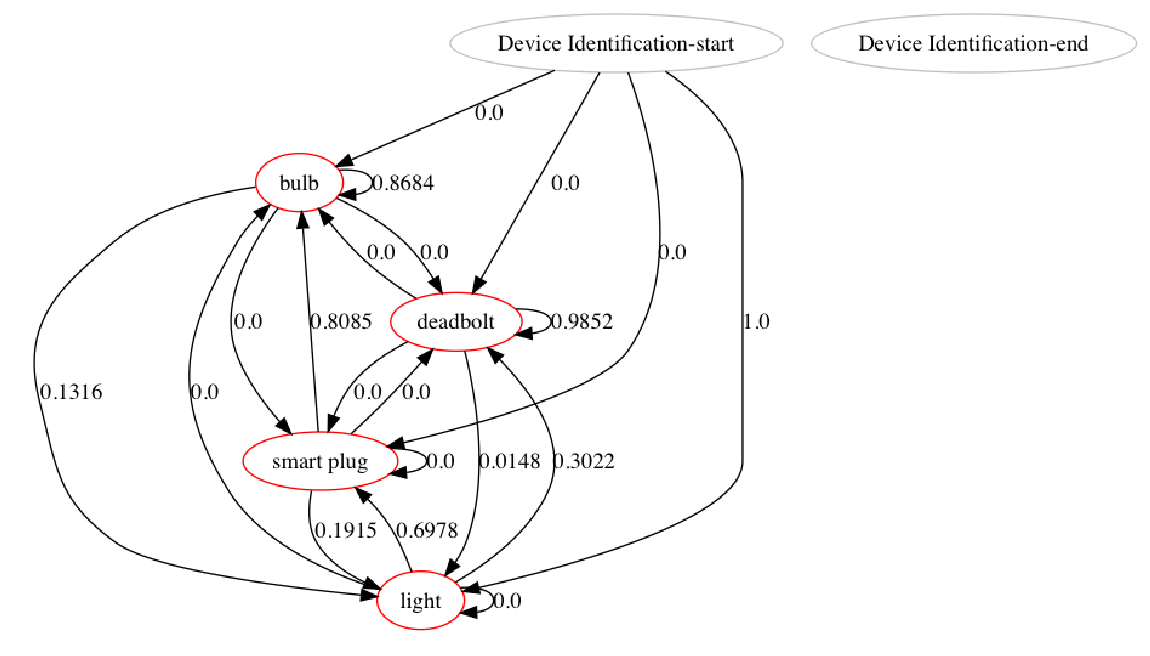

In [11]:
plt.figure(figsize=(20,20))
model.plot()

In [14]:
test_seq1 = [p23]
test_seq2 = [p23]
test_seq3 = [p37, p23]
test_seq4 = [p22]
test_seq5 = [p23]
test_seq6 = [p18]
test_seq7 = [p23]
test_seq8 = [p18]
test_seq9 = [p18]
test_seq10 = [p18]
test_seq11 = [p34]
test_seq12 = [p28]
test_seq13 = [p32]
test_seq14 = [p34]
test_seq15 = [p28]
test_seq16 = [p8, p2, p12, p4, p13, p1, p36, p10, p9]
test_seq17 = [p8, p2, p12, p4, p13, p1, p36, p10, p9]
test_seq18 = [p9]
test_seq19 = [p5]
test_seq20 = [p9]


In [15]:
# test_seq =  [p15, p23, p25, p21, p21, p11, p7, p9, p5, p12, 
#              p11, p6, p7, p9, p5, p12, p6, p18, p22, p22, p14, 
#              p21, p11, p7, p9, p5, p12, p6, p16, p22, p19, p3, p17, 
#              p28, p34, p15, p25, p25, p22, p22, p35, p15, p25, p32, 
#              p15, p18, p26, p23, p19, p3, p8, p2, p12, p4, p13, p1, 
#              p36, p10, p15, p25, p26, p23, p23, p34, p15, p22, p33, 
#              p15, p18, p25, p4, p4, p33, p15, p18, p26]

# test_seq = [p15, p23, p25, p21, p21, p11, p7, p9, p5, p12, p11, p6, 
#             p7, p9, p5, p12, p6, p18, p22, p22, p14, p21, p11, p7,
#             p9, p5, p12, p6, p16, p22, p19, p3, p17, p28]

test_seq_list = [test_seq1,
    test_seq2,
    test_seq3,
    test_seq4,
    test_seq5,
    test_seq6,
    test_seq7,
    test_seq8,
    test_seq9,
    test_seq10,
    test_seq11,
    test_seq12,
    test_seq13,
    test_seq14,
    test_seq15,
    test_seq16,
    test_seq17,
    test_seq18,
    test_seq19,
    test_seq20]

for ts in test_seq_list: 
    hmm_predictions = model.predict( ts )

    result = zip(hmm_predictions, test_seq)

    for i in range(0, len(model.states)):
        print("hmm state {}: {}".format(i, model.states[i].name))

    for x in result:
        print ("{} -> {}".format(x[0], x[1]))

hmm state 0: bulb
hmm state 1: deadbolt
hmm state 2: light
hmm state 3: smart plug
hmm state 4: Device Identification-start
hmm state 5: Device Identification-end
2 -> 285
hmm state 0: bulb
hmm state 1: deadbolt
hmm state 2: light
hmm state 3: smart plug
hmm state 4: Device Identification-start
hmm state 5: Device Identification-end
2 -> 285
hmm state 0: bulb
hmm state 1: deadbolt
hmm state 2: light
hmm state 3: smart plug
hmm state 4: Device Identification-start
hmm state 5: Device Identification-end
2 -> 285
3 -> 417
hmm state 0: bulb
hmm state 1: deadbolt
hmm state 2: light
hmm state 3: smart plug
hmm state 4: Device Identification-start
hmm state 5: Device Identification-end
2 -> 285
hmm state 0: bulb
hmm state 1: deadbolt
hmm state 2: light
hmm state 3: smart plug
hmm state 4: Device Identification-start
hmm state 5: Device Identification-end
2 -> 285
hmm state 0: bulb
hmm state 1: deadbolt
hmm state 2: light
hmm state 3: smart plug
hmm state 4: Device Identification-start
hmm sta

y_p:
hmm state 0: bulb
hmm state 1: deadbolt
hmm state 2: light
hmm state 3: smart plug
hmm state 4: Device Identification-start
hmm state 5: Device Identification-end
2 -> 285
3 -> 417
0 -> 419
0 -> 415
0 -> 415
2 -> 145
1 -> 129
1 -> 138
1 -> 121
1 -> 146
1 -> 145
1 -> 122
1 -> 129
1 -> 138
1 -> 121
1 -> 146
1 -> 122
2 -> 306
3 -> 416
0 -> 416
2 -> 284
0 -> 415
2 -> 145
1 -> 129
1 -> 138
1 -> 121
1 -> 146
1 -> 122
2 -> 304
3 -> 416
2 -> 342
3 -> 1185
2 -> 305
3 -> 425
0 -> 438
2 -> 285
3 -> 419
0 -> 419
0 -> 416
2 -> 416
1 -> 439
2 -> 285
3 -> 419
0 -> 435
0 -> 285
2 -> 306
3 -> 420
0 -> 417
2 -> 342
3 -> 1185
2 -> 132
1 -> 111
1 -> 146
1 -> 120
1 -> 223
1 -> 103
1 -> 535
1 -> 141
2 -> 285
3 -> 419
0 -> 420
0 -> 417
0 -> 417
0 -> 438
2 -> 285
3 -> 416
0 -> 436
0 -> 285
2 -> 306
3 -> 419
1 -> 120
1 -> 120
1 -> 436
1 -> 285
2 -> 306
3 -> 420